In [3]:

#3rd Part & Standard Library
import numpy as np
import math

#Internal Library
from SimpleJzAzBz import ColorConverter

#Creation of ColorConverter Class
cc = ColorConverter()

In [4]:
#let's get a sample set of JzAzBz colors in an equal rotation 
# around the Hz (hue axis)



#Start with point for color rotation, convert the rgb to Xyz and check the valye
kinda_red_rgb = np.array([[217.0, 85.0, 45.0]])
expected_xyz = np.array([0.323410, 0.214427, 0.049180])
xyz_d65 = cc.srgb_2_xyz65(kinda_red_rgb)
print('XYZ_out:', xyz_d65)
print('Expected out', expected_xyz, '\n')



#Convert XYZ to Jzazbz
jzazbz = cc.xyz65_2_jzazbz(xyz_d65)
jzczhz = cc.jzazbz_2_jzczhz(jzazbz)
print('jzczhz', jzczhz)
print('Hue Angle = ', jzczhz[:,2]*180/np.pi)



#time to sweep one degree in hue angle and generate the jzczhz set for that.
#converting arctan to angle in degrees
n_sample = 100
hue_angle = jzczhz[:,2]*180/np.pi
ha_space = np.linspace(hue_angle, hue_angle+365, num=n_sample)




#filling empty array space with the values of jz,cz
jz_space = np.full((n_sample,1), jzczhz[:,0])
cz_space = np.full((n_sample,1), jzczhz[:,1])

#aggregating array
jzczhz_sample = np.array([jz_space[:,0], cz_space[:,0], ha_space[:,0]]).T

#converting angle back to hz
jzczhz_sample[:,2] = jzczhz_sample[:,2] * np.pi/180

#convert samples back into jzazbz
jzazbz_sample = cc.jzczhz_2_jzazbz(jzczhz_sample)

#JzazBz to XYZ65
xyz65_sample = cc.jzazbz_2_xyz65(jzazbz_sample)
#print(xyz65_sample)

#Xyz65 to sRGB
sRGB_sample = cc.xyz65_2_srgb(xyz65_sample) 

"""
There are negative values in sRGB as the sweep across jzazbz space extends farther than conventional RGB maps to in XYZ space.
We will now employ two methods of compression, by extending the gamut and by flooring any values below 0 and above 255 to 0 and 255.
The loss of RGB information will then be plotted.
"""

XYZ_out: [[ 0.32340957  0.21442733  0.04917999]]
Expected out [ 0.32341   0.214427  0.04918 ] 

jzczhz [[ 0.00752644  0.01361626  0.74233409]]
Hue Angle =  [ 42.53261054]


'\nThere are negative values in sRGB as the sweep across jzazbz space extends farther than conventional RGB maps to in XYZ space.\nWe will now employ two methods of compression, by extending the gamut and by flooring any values below 0 and above 255 to 0 and 255.\nThe loss of RGB information will then be plotted.\n'

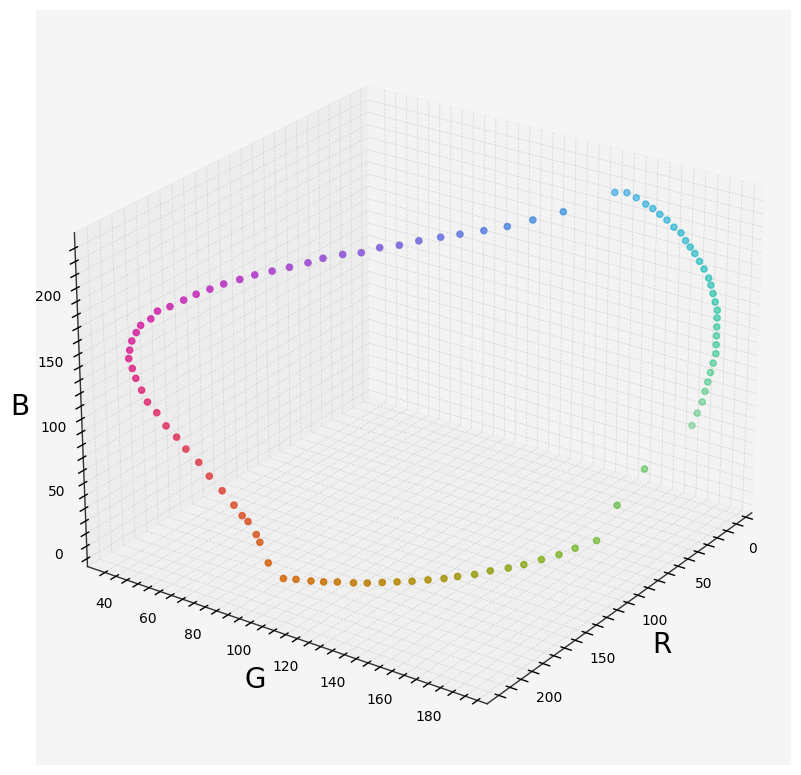

In [23]:
sRGB_floor = sRGB_sample
#Any value over 255 is made 255, any under 0 are made 0.
with np.nditer(sRGB_floor, op_flags=['readwrite']) as cr:
    for i in cr:
        if i > 255.0:
            i[...] = 255
        elif i < 0:
            i[...] = 0
c = np.abs(sRGB_floor/255) #putting into [0:1] range

#Plotting!
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection = '3d')

ax.set_xlabel('R', fontsize=20)
ax.set_ylabel('G', fontsize=20)
ax.set_zlabel('B', fontsize=20)

r = sRGB_sample[:,0]
g = sRGB_sample[:,1]
b = sRGB_sample[:,2]

ax.view_init(25, 35)
ax.scatter(r,g,b, c=c)
plt.savefig('rgbspace.png')

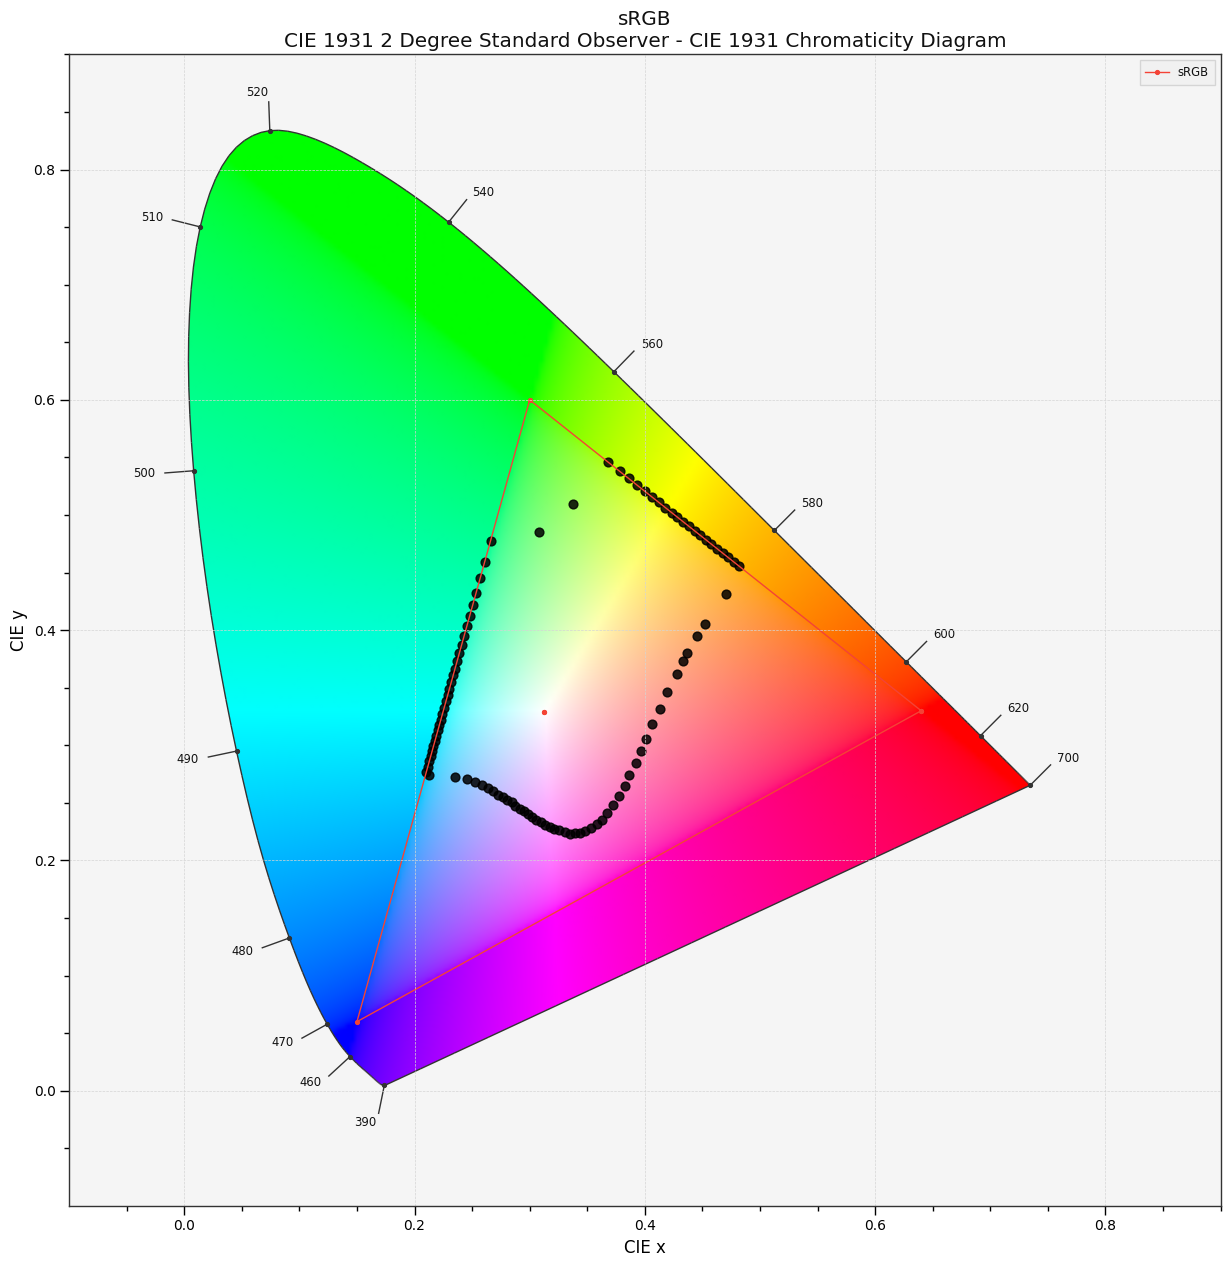

In [21]:
#Now we will increase the gamut of the original rgb sample. 
# we expect to see some misrepresentation of hue.

from colour.plotting import *
x = plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(sRGB_sample, scatter_kwargs={'c':'black'})
x[0].savefig('chromaticities.png')